In [1]:
!pip install nltk gensim pennylane pennylane-lightning -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 7.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source

In [2]:
!pip install --upgrade numpy -q # upgrade numpy
!pip install --upgrade --force-reinstall nltk gensim pennylane pennylane-lightning scipy -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 58.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.7 MB/s eta 0:00

In [1]:
#@markdown Need Restart Runtime or Restart Session
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import pennylane as qml
from pennylane import numpy as np
import nltk
from pennylane.optimize import AdamOptimizer
nltk.download('punkt_tab')
nltk.download('punkt')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
#@title Word Embedding
sentences = ["Dynex powers Quantum entanglement", "Neuromorphic networks process qubits"]
tokenization = [word_tokenize(sentence.lower()) for sentence in sentences]
word2vec = Word2Vec(sentences=tokenization, vector_size=8, window=5, min_count=1, workers=4)

In [3]:
#@title Basis Embedding
qubits = 8
n_shots = 2**(qubits * 2)
dev = qml.device("default.qubit", wires=qubits * 2, shots=n_shots)

In [4]:
#@title Versi1
@qml.qnode(dev)
def QuantumPositionalAttention(inputs,
                                weights=np.random.randn(3, qubits, 3),
                                positional_weight=np.random.randn(3, qubits * 2, 2)):

    positional_inputs = np.arange(qubits)
    qml.AngleEmbedding(inputs, wires=range(0, qubits))
    qml.AngleEmbedding(positional_inputs, wires=range(qubits, qubits * 2))

    # Main rotation attention layers
    for layer in range(3):
        for i in range(qubits):
            # qml.Hadamard(wires=i)
            qml.RX(weights[layer][i][0] * inputs[i % len(inputs)], wires=i)
            qml.RY(weights[layer][i][1] * inputs[(i + 1) % len(inputs)], wires=i)
            qml.RZ(weights[layer][i][2] * inputs[(i + 2) % len(inputs)], wires=i)
        for i in range(qubits - 1):
            qml.CRZ(np.pi / (layer + 2), wires=[i, (i + 1) % qubits])
            qml.CNOT(wires=[i, (i + 1) % qubits])

    # Positional encoding rotation layers
    for layer in range(3):
        for i in range(qubits, qubits * 2):
            # qml.Hadamard(wires=i)
            qml.RX(positional_weight[layer][i][0] * inputs[i % len(inputs)], wires=i)
            qml.RY(positional_weight[layer][i][1] * inputs[(i + 1) % len(inputs)], wires=i)
        for i in range(qubits, qubits * 2 - 1):
            qml.CRZ(np.pi / (layer + 2), wires=[i, (i + 1) % (qubits * 2)])
            qml.CNOT(wires=[i, (i + 1) % (qubits * 2)])

    # for i in range(qubits*2):
    #   qml.Hadamard(wires=i)

    """
    Grover’s Operator
    """
    qml.QFT(wires=range(qubits))
    qml.adjoint(qml.QFT)(wires=range(qubits))
    qml.GroverOperator(wires=range(qubits))

    qml.QFT(wires=range(qubits, qubits * 2))
    qml.adjoint(qml.QFT)(wires=range(qubits, qubits * 2))
    qml.GroverOperator(wires=range(qubits, qubits * 2))

    """
    Final Quantum Operations
    """

    for i in range(qubits):
        qml.Hadamard(wires=i)
        qml.T(wires=i)
        qml.RZ(inputs[i % len(inputs)], wires=i)

        qml.Hadamard(wires=i + qubits)
        qml.T(wires=i + qubits)
        qml.RZ(inputs[i % len(inputs)], wires=i + qubits)

        qml.AngleEmbedding(inputs, wires=range(qubits))
        qml.AngleEmbedding(positional_inputs, wires=range(qubits, qubits * 2))

        vector_res = []
        inputs_V = [qml.expval(qml.PauliZ(wires=i)) for i in range(qubits)]
        inputs_P = [qml.expval(qml.PauliZ(wires=i)) for i in range(qubits, qubits * 2)]

        vector_res.append(inputs_V)
        vector_res.append(inputs_P)

        vector_res2 = inputs_V + inputs_P
        return vector_res2

In [8]:
#@title Versi2
@qml.qnode(dev)
def QuantumPositionalAttention(inputs,
                                weights:np.ndarray = np.random.randn(3, qubits, 3),
                                positional_weight: np.ndarray = np.random.randn(3, qubits * 2, 2)):

    positional_inputs = np.arange(qubits)
    qml.AngleEmbedding(inputs, wires=range(0, qubits))
    qml.AngleEmbedding(positional_inputs, wires=range(qubits, qubits * 2))

    # Main rotation attention layers
    for layer in range(3):
        for i in range(qubits):
            # qml.Hadamard(wires=i)
            qml.RX(weights[layer][i][0] * inputs[i % len(inputs)], wires=i)
            qml.RY(weights[layer][i][1] * inputs[(i + 1) % len(inputs)], wires=i)
            qml.RZ(weights[layer][i][2] * inputs[(i + 2) % len(inputs)], wires=i)
        for i in range(qubits - 1):
            qml.CRZ(np.pi / (layer + 2), wires=[i, (i + 1) % qubits])
            qml.CNOT(wires=[i, (i + 1) % qubits])

    # Positional encoding rotation layers
    for layer in range(3):
        for i in range(qubits, qubits * 2):
            # qml.Hadamard(wires=i)
            qml.RX(positional_weight[layer][i][0] * inputs[i % len(inputs)], wires=i)
            qml.RY(positional_weight[layer][i][1] * inputs[(i + 1) % len(inputs)], wires=i)
        for i in range(qubits, qubits * 2 - 1):
            qml.CRZ(np.pi / (layer + 2), wires=[i, (i + 1) % (qubits * 2)])
            qml.CNOT(wires=[i, (i + 1) % (qubits * 2)])

    # for i in range(qubits*2):
    #   qml.Hadamard(wires=i)

    """
    Grover’s Operator
    """
    qml.QFT(wires=range(qubits))
    qml.adjoint(qml.QFT)(wires=range(qubits))
    qml.GroverOperator(wires=range(qubits))

    qml.QFT(wires=range(qubits, qubits * 2))
    qml.adjoint(qml.QFT)(wires=range(qubits, qubits * 2))
    qml.GroverOperator(wires=range(qubits, qubits * 2))

    """
    Final Quantum Operations
    """

    for i in range(qubits):
        qml.Hadamard(wires=i)
        qml.T(wires=i)
        qml.RZ(inputs[i % len(inputs)], wires=i)

        qml.Hadamard(wires=i + qubits)
        qml.T(wires=i + qubits)
        qml.RZ(inputs[i % len(inputs)], wires=i + qubits)

        qml.AngleEmbedding(inputs, wires=range(qubits))
        qml.AngleEmbedding(positional_inputs, wires=range(qubits, qubits * 2))

    # Moved outside the loop to be at the end
    vector_res = []
    inputs_V = [qml.expval(qml.PauliZ(wires=i)) for i in range(qubits)]
    inputs_P = [qml.expval(qml.PauliZ(wires=i)) for i in range(qubits, qubits * 2)]

    vector_res.append(inputs_V)
    vector_res.append(inputs_P)

    vector_res2 = inputs_V, inputs_P

    measurements = qml.sample(wires=range(qubits))  # Measurement at the end

    return vector_res2, measurements

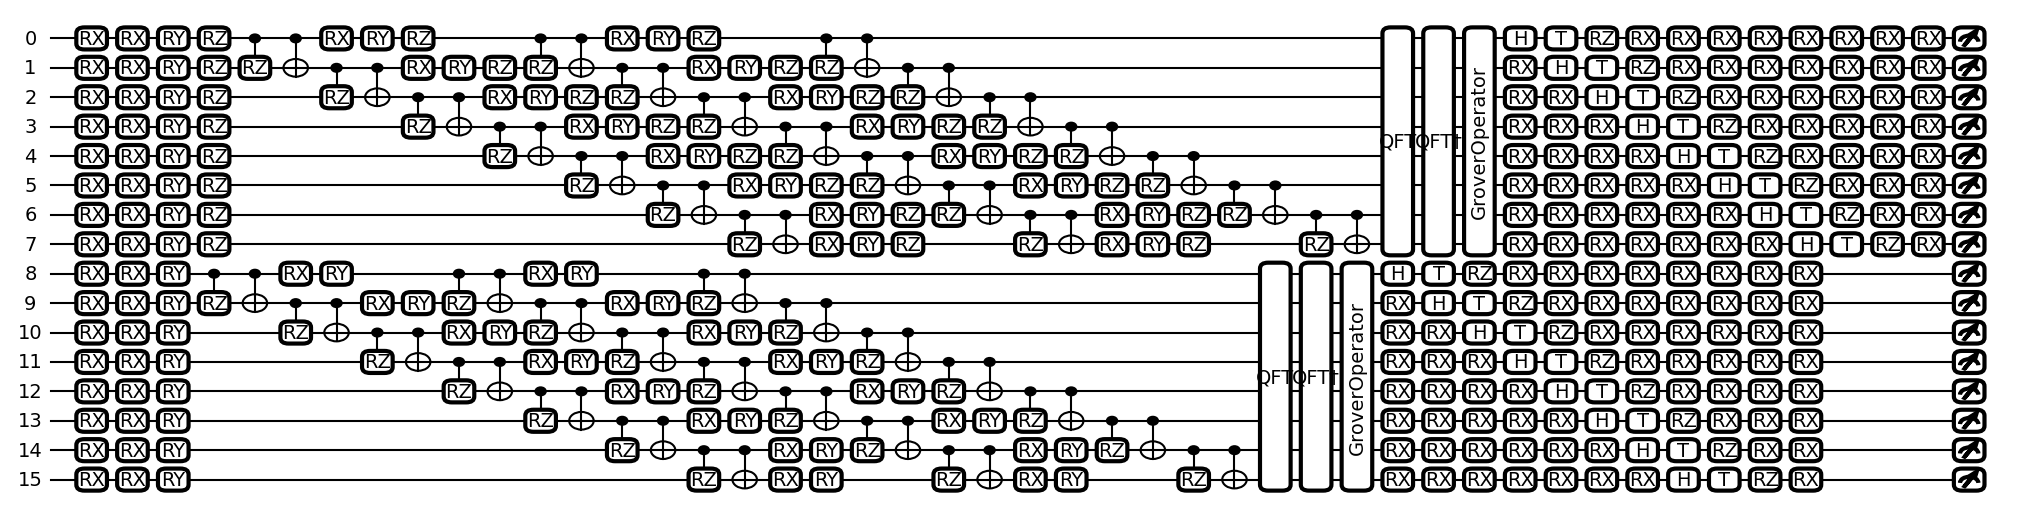

In [9]:
import matplotlib.pyplot as plt

params = {
    'weights': np.random.randn(3, qubits, 3),
    'positional_weights': np.random.randn(3, qubits * 2, 2)
}

dummy_input = np.random.randn(qubits)
result, measurements = QuantumPositionalAttention(dummy_input)
result = np.array(result[0]) * np.array(result[1])

# Draw the circuit
drawer = qml.draw_mpl(QuantumPositionalAttention)
fig, ax = drawer(dummy_input)
fig.set_size_inches(20, 5)
plt.show()


In [7]:
#@title tensor to list function
def tensor_to_list(tensor):
    # Check if the tensor is 0-dimensional (a scalar)
    if tensor.ndim == 0:
        return [tensor.item()]  # Return a list containing the single value
    # Otherwise, proceed as before for higher-dimensional tensors
    else:
        return tensor.tolist()  #  Use tolist() for direct conversion to a list

In [15]:
#@title Quantum Self Attention Single or Multi Respon
def QuantumSelfAttention(inputs, mode="single"):
    """
    mode="single" → return vector_res2 (1 response)
    mode="multi"  → return measurements (many responses)
    """
    vector_res2, measurements = QuantumPositionalAttention(inputs)
    vector_res2 = np.array(vector_res2[0]) * np.array(vector_res2[1])

    if mode == "single":
        return vector_res2
    elif mode == "multi":
        return measurements
    else:
        raise ValueError(f"Unknown mode {mode}")

In [16]:
import numpy as np
def softmax(x):
    ex = np.exp(x - np.max(x))
    return ex / np.sum(ex, axis=0)


def loss_fn(weights, input_vector, target_vector):
    output = QuantumSelfAttention(input_vector, mode="single")
    if len(output) != len(target_vector):
        adjusted = np.zeros_like(target_vector)
        adjusted[: len(output)] = output
    else:
        adjusted = output
    cos_sim = np.dot(adjusted, target_vector) / (
        np.linalg.norm(adjusted) * np.linalg.norm(target_vector)
    )
    return 1 - cos_sim


def adjust_vector_size(vector, target_size):
    # If the vector length is smaller, add zeros.
    adjusted_vector = np.zeros(target_size)
    adjusted_vector[:len(vector)] = vector  # Fill with existing vector values
    return adjusted_vector

def find_most_similar_word(vector):
    """Find the most similar word to a given vector"""
    most_similar = None
    max_similarity = -float('inf')

    # Make sure the vector has a size that fits word2vec
    vector = adjust_vector_size(vector, word2vec.vector_size)

    # Iterate through all words in the Word2Vec model
    for word in word2vec.wv.index_to_key:
        wv = word2vec.wv[word]
        similarity = np.dot(wv, vector) / (np.linalg.norm(wv) * np.linalg.norm(vector))

        if similarity > max_similarity:
            max_similarity = similarity
            most_similar = word

    return most_similar

# ————————————————————————————————————
# 4) GenerateSentence with two modes
# ————————————————————————————————————
def GenerateSentence(input_, mode="single"):
    tokens = word_tokenize(input_.lower())
    embeddings = np.array([word2vec.wv[word] for word in tokens])
    generated = []

    if mode == "single":
        for emb in embeddings:
            out = QuantumSelfAttention(emb, mode="single")
            probs = softmax(out)
            generated.append(find_most_similar_word(probs))
        return " ".join(generated[:5])

    elif mode == "multi":
        measurements = QuantumSelfAttention(embeddings[0], mode="multi")
        all_words = []
        for bitstring in measurements:
            vec = np.where(bitstring == 0, -1.0, 1.0)
            all_words.append(find_most_similar_word(vec))
        return all_words

    else:
        raise ValueError("mode must be 'single' or 'multi'")

# test generated

In [17]:
# input_ = np.random.choice(sentences)
input_ = "qubits"
generated = GenerateSentence(input_, mode="single")
print(f"Generated: {generated}")

Generated: qubits


In [18]:
candidates = GenerateSentence("qubits", mode="multi")
print("Kandidat kata:", candidates)

Kandidat kata: ['networks', 'networks', 'networks', 'dynex', 'powers', 'quantum', 'entanglement', 'process', 'dynex', 'qubits', 'networks', 'quantum', 'qubits', 'entanglement', 'entanglement', 'neuromorphic', 'powers', 'quantum', 'quantum', 'networks', 'networks', 'quantum', 'dynex', 'process', 'entanglement', 'networks', 'quantum', 'networks', 'entanglement', 'powers', 'networks', 'powers', 'networks', 'networks', 'networks', 'quantum', 'dynex', 'quantum', 'qubits', 'dynex', 'entanglement', 'neuromorphic', 'entanglement', 'powers', 'networks', 'networks', 'neuromorphic', 'qubits', 'networks', 'quantum', 'process', 'networks', 'entanglement', 'networks', 'neuromorphic', 'networks', 'networks', 'powers', 'process', 'networks', 'qubits', 'dynex', 'qubits', 'entanglement', 'networks', 'entanglement', 'quantum', 'process', 'powers', 'process', 'process', 'networks', 'process', 'networks', 'dynex', 'dynex', 'quantum', 'quantum', 'entanglement', 'networks', 'entanglement', 'entanglement', 'n

# Training And Test Using Dataset

In [10]:
!pip install datasets tqdm -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==1

In [26]:
import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
from datasets import load_dataset
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from tqdm import tqdm

# ————————————————————————————————————————————————
# 1) Load & split HuggingFace dataset
# ————————————————————————————————————————————————
dataset = load_dataset("PrimeIntellect/NuminaMath-QwQ-CoT-5M")
# slice dataset sample
dataset = dataset["train"].select(range(1000))

splits  = dataset.train_test_split(test_size=0.1, seed=42)
train_dataset = splits["train"]
test_dataset  = splits["test"]

print("Download and Load Dataset Successfull")
# ————————————————————————————————————————————————
# 2) Train Word2Vec on prompt+response
# ————————————————————————————————————————————————
sentences = []
for entry in tqdm(train_dataset, desc="Preparing sentences", unit="entry"):
    try:
        prompt = entry.get("prompt", "")
        response = entry.get("response", "")
        if isinstance(prompt, str) and isinstance(response, str):
            prompt_words = prompt.strip().split()
            response_words = response.strip().split()
            if prompt_words and response_words:  # only keep non-empty
                sentences.append(prompt_words + response_words)
    except Exception as e:
        continue  # Skip if any unexpected error occurs

# Check if sentences are ready
if not sentences:
    raise ValueError("No valid sentences found for Word2Vec training.")

# Train Word2Vec
word2vec_model = Word2Vec(
    sentences=sentences,
    vector_size=8,
    window=5,
    min_count=1,
    workers=4,
)

print("✅ Train Word2Vec Successful")
# ————————————————————————————————————————————————
# 3) QNode definition (QuantumPositionalAttention)
# ————————————————————————————————————————————————
qubits  = 8
n_shots = 2 ** (qubits * 2)
dev     = qml.device("default.qubit", wires=qubits * 2, shots=n_shots)

@qml.qnode(dev)
def QuantumPositionalAttention(
    inputs,
    weights: np.ndarray            = np.random.randn(3, qubits,     3),
    positional_weight: np.ndarray  = np.random.randn(3, qubits * 2, 2),
):
    # — angle embedding —
    qml.AngleEmbedding(inputs, wires=range(qubits))
    qml.AngleEmbedding(np.arange(qubits), wires=range(qubits, qubits*2))

    # — main attention layers —
    for layer in range(3):
        for i in range(qubits):
            w0, w1, w2 = weights[layer][i]
            qml.RX(w0 * inputs[i % len(inputs)], wires=i)
            qml.RY(w1 * inputs[(i + 1) % len(inputs)], wires=i)
            qml.RZ(w2 * inputs[(i + 2) % len(inputs)], wires=i)
        for i in range(qubits - 1):
            qml.CRZ(np.pi / (layer + 2), wires=[i, i + 1])
            qml.CNOT(wires=[i, i + 1])

    # — positional encoding layers —
    for layer in range(3):
        for i in range(qubits, qubits * 2):
            w0, w1 = positional_weight[layer][i]
            qml.RX(w0 * inputs[i % len(inputs)], wires=i)
            qml.RY(w1 * inputs[(i + 1) % len(inputs)], wires=i)
        for i in range(qubits, qubits * 2 - 1):
            qml.CRZ(np.pi / (layer + 2), wires=[i, i + 1])
            qml.CNOT(wires=[i, i + 1])

    # — Grover blocks —
    qml.QFT(wires=range(qubits));          qml.adjoint(qml.QFT)(wires=range(qubits))
    qml.GroverOperator(wires=range(qubits))
    qml.QFT(wires=range(qubits, qubits*2)); qml.adjoint(qml.QFT)(wires=range(qubits, qubits*2))
    qml.GroverOperator(wires=range(qubits, qubits*2))

    # — final ops & embeddings re-run —
    for i in range(qubits):
        qml.Hadamard(wires=i)
        qml.T(wires=i)
        qml.RZ(inputs[i % len(inputs)], wires=i)

        qml.Hadamard(wires=i + qubits)
        qml.T(wires=i + qubits)
        qml.RZ(inputs[i % len(inputs)], wires=i + qubits)

    qml.AngleEmbedding(inputs, wires=range(qubits))
    qml.AngleEmbedding(np.arange(qubits), wires=range(qubits, qubits*2))

    # — collect expectation values (single‐response) —
    # ev_V = [qml.expval(qml.PauliZ(wires=i)) for i in range(qubits)]
    # ev_P = [qml.expval(qml.PauliZ(wires=i)) for i in range(qubits, qubits*2)]
    ev = [qml.expval(qml.PauliZ(wires=i)) for i in range(qubits*2)]

    # — collect measurements (multi‐response) —
    measurements = qml.sample(wires=range(qubits))

    return ev, measurements

# ————————————————————————————————————————————————
# 4) Wrapper QuantumSelfAttention → select mode
# ————————————————————————————————————————————————
def QuantumSelfAttention(inputs, weights, positional_weight, mode="single"):
    ev, meas = QuantumPositionalAttention(
        inputs,
        weights=weights,
        positional_weight=positional_weight,
    )
    if mode == "single":
        ev = np.array(ev)
        vec = ev[:qubits] * ev[qubits:]
        return vec
    elif mode == "multi":
        return meas
    else:
        raise ValueError("mode must be 'single' or 'multi'")


# ————————————————————————————————————————————————
# 5) Loss function to optimize both parameters
# ————————————————————————————————————————————————
def softmax(x):
    e = np.exp(x - np.max(x))
    return e / np.sum(e)

def loss_fn(weights, positional_weight, input_vec, target_vec):
    out = QuantumSelfAttention(input_vec, weights, positional_weight, mode="single")
    if len(out) != len(target_vec):
        adj = np.zeros_like(target_vec)
        adj[: len(out)] = out
    else:
        adj = out
    cos_sim = np.dot(adj, target_vec) / (np.linalg.norm(adj) * np.linalg.norm(target_vec))
    return 1 - cos_sim

Resolving data files:   0%|          | 0/88 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/88 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/87 [00:00<?, ?it/s]

Download and Load Dataset Successfull


Preparing sentences: 100%|██████████| 900/900 [00:00<00:00, 3173.31entry/s]


✅ Train Word2Vec Successful


In [27]:
# ————————————————————————————————————————————————
# 6) Training loop (optimize BOTH weights & positional_weight)
# ————————————————————————————————————————————————
num_layers = 3
# initialize both parameter tensors
weights           = np.random.randn(num_layers, qubits,     3)
positional_weight = np.random.randn(num_layers, qubits * 2, 2)

opt = AdamOptimizer(stepsize=0.01)
epochs = 3

print("Starting Training")
for epoch in range(1, epochs + 1):
    loss_epoch = 0.0

    # wrapping the inner loop with tqdm to show per‐sample progress
    for entry in tqdm(train_dataset,
                      desc=f"Epoch {epoch}/{epochs}",
                      unit="sample"):
        inp_vec = np.mean([word2vec_model.wv[w] for w in entry["prompt"].split()], axis=0)
        tgt_vec = np.mean([word2vec_model.wv[w] for w in entry["response"].split()], axis=0)

        (weights, positional_weight), loss_val = opt.step_and_cost(
            lambda w, p: loss_fn(w, p, inp_vec, tgt_vec),
            weights,
            positional_weight,
        )
        loss_epoch += loss_val

    avg_loss = loss_epoch / len(train_dataset)
    print(f"Epoch {epoch:2d} — Avg loss = {avg_loss:.4f}")
print("Training Successfull")

Starting Training


Epoch 1/3:   0%|          | 0/900 [00:00<?, ?sample/s]/usr/local/lib/python3.11/dist-packages/pennylane/_grad.py:216: UserWarning: Attempted to differentiate a function with no trainable parameters. If this is unintended, please add trainable parameters via the 'requires_grad' attribute or 'argnum' keyword.
  warnings.warn(
Epoch 1/3: 100%|██████████| 900/900 [07:13<00:00,  2.07sample/s]


Epoch  1 — Avg loss = 1.0225


Epoch 2/3: 100%|██████████| 900/900 [07:08<00:00,  2.10sample/s]


Epoch  2 — Avg loss = 1.0234


Epoch 3/3: 100%|██████████| 900/900 [07:06<00:00,  2.11sample/s]

Epoch  3 — Avg loss = 1.0230
Training Successfull


In [28]:
# ————————————————————————————————————————————————
# 7) Evaluation
# ————————————————————————————————————————————————
print("Starting Evaluation")
correct = 0
for entry in test_dataset:
    # Get words from the prompt
    words = entry["prompt"].split()

    # Filter words that are in the word2vec vocabulary
    known_words = [w for w in words if w in word2vec_model.wv]

    # If no known words, skip this entry
    if not known_words:
        continue

    # Calculate the input vector using known words only
    inp_vec = np.mean([word2vec_model.wv[w] for w in known_words], axis=0)

    # use single mode for prediction
    out_vec = QuantumSelfAttention(inp_vec, weights, positional_weight, mode="single")
    # map ke kata terdekat
    pred = None
    best = -1.0
    for w in word2vec_model.wv.index_to_key:
        sim = np.dot(word2vec_model.wv[w], out_vec) / (
            np.linalg.norm(word2vec_model.wv[w]) * np.linalg.norm(out_vec)
        )
        if sim > best:
            best = sim
            pred = w
    if pred == entry["correct"]:
        correct += 1

print("Evaluation Successfull")
acc = correct / len(test_dataset)
print(f"Test accuracy: {acc*100:.2f}%")

Starting Evaluation
Evaluation Successfull
Test accuracy: 0.00%
